In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation , Dropout
from keras.optimizers import SGD,Adam
import random

In [33]:
# load data
with open('C:\\Users\\prash\\Mental-health-Chatbot\\intents.json') as file:
  data = json.load(file)

data

{'intents': [{'tag': 'greeting',
   'patterns': ['Hi',
    'Hey',
    'Is anyone there?',
    'Hi there',
    'Hello',
    'Hey there',
    'Howdy',
    'Hola',
    'Bonjour',
    'Hay',
    'Sasa',
    'Good Evening',
    'Good afternoon'],
   'responses': ['Hello there. Tell me how are you feeling today?',
    'Hi there. What brings you here today?',
    'Hi there. How are you feeling today?',
    'Great to see you. How do you feel currently?',
    "Hello there. Glad to see you're back. What's going on in your world right now?"]},
  {'tag': 'morning',
   'patterns': ['Good morning'],
   'responses': ["Good morning. I hope you had a good night's sleep. How are you feeling today? "]},
  {'tag': 'afternoon',
   'patterns': ['Good afternoon'],
   'responses': ['Good afternoon. How is your day going?']},
  {'tag': 'evening',
   'patterns': ['Good evening'],
   'responses': ['Good evening. How has your day been?']},
  {'tag': 'night',
   'patterns': ['Good night'],
   'responses': ['Good n

In [34]:
lemmatizer = WordNetLemmatizer()
words = []
classes = []
documents = []
ignore_words = ['?', '!']

for intent in data['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))

        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [35]:
documents

[(['Hi'], 'greeting'),
 (['Hey'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hi', 'there'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Hey', 'there'], 'greeting'),
 (['Howdy'], 'greeting'),
 (['Hola'], 'greeting'),
 (['Bonjour'], 'greeting'),
 (['Hay'], 'greeting'),
 (['Sasa'], 'greeting'),
 (['Good', 'Evening'], 'greeting'),
 (['Good', 'afternoon'], 'greeting'),
 (['Good', 'morning'], 'morning'),
 (['Good', 'afternoon'], 'afternoon'),
 (['Good', 'evening'], 'evening'),
 (['Good', 'night'], 'night'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Au', 'revoir'], 'goodbye'),
 (['Sayonara'], 'goodbye'),
 (['ok', 'bye'], 'goodbye'),
 (['Bye', 'then'], 'goodbye'),
 (['Fare', 'thee', 'well'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['Thanks', 'for', 'the', 'help'], 'thanks'),
 (['Than', 'you', 'very', 'much'], 'thanks'),
 ([], 'no-response'),
 (['nothing',

In [36]:
pickle.dump(words, open('new_texts.pkl', 'wb'))
pickle.dump(classes, open('new_labels.pkl', 'wb'))

In [37]:
# create our training data
training = []
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
# (Previous code remains unchanged)

training = []

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

# Shuffle the training data
random.shuffle(training)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(training, test_size=.1, random_state=42)

# Separate into train_x, train_y, test_x, test_y
train_x = np.array([sample[0] for sample in train_data])
train_y = np.array([sample[1] for sample in train_data])
test_x = np.array([sample[0] for sample in test_data])
test_y = np.array([sample[1] for sample in test_data])


#training = np.array(training)
# create train and test lists. X - patterns, Y - intents

# Separate features (X) and labels (Y)
#train_x = np.array([sample[0] for sample in training])  # Extract bag of words
#train_y = np.array([sample[1] for sample in training])  # Extract output rows"""

print("Training data created")

Training data created


In [38]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

In [39]:
# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
vsgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=vsgd, metrics=['accuracy'])

In [58]:
# fitting and saving the mode
hist = model.fit(np.array(train_x), np.array(train_y), epochs=300, batch_size=20, verbose=1)

Epoch 1/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8898
Epoch 2/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4611 - accuracy: 0.8701
Epoch 3/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4036 - accuracy: 0.8740
Epoch 4/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3976 - accuracy: 0.8819
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.8346
Epoch 6/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.8504
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4326 - accuracy: 0.8622
Epoch 8/300
13/13 [==============================] - 0s 3ms/step - loss: 0.4047 - accuracy: 0.8858
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8661
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3429 - accuracy: 0.8858
Epoch 11/

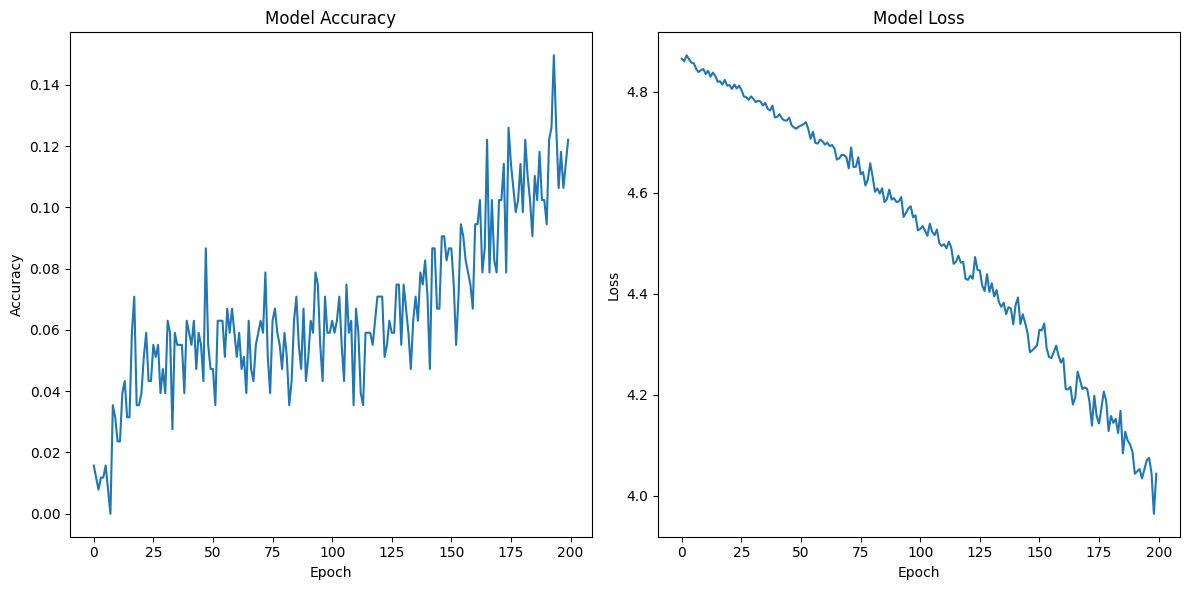

In [41]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()




In [42]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model2 = Sequential()
model2.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(len(train_y[0]), activation='softmax'))

# Define the Adam optimizer with desired parameters
adam = Adam(learning_rate=0.01)  

# Compile the model using Adam optimizer
model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [46]:
# fitting and saving the mode
hist = model2.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=15, verbose=1)

Epoch 1/200
17/17 [==============================] - 0s 4ms/step - loss: 1.2027 - accuracy: 0.7205
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 1.0601 - accuracy: 0.7362
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 1.2153 - accuracy: 0.6614
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 1.2104 - accuracy: 0.6929
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 1.2258 - accuracy: 0.7126
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 1.1286 - accuracy: 0.7283
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 1.0133 - accuracy: 0.7559
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 1.1329 - accuracy: 0.6969
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.8512 - accuracy: 0.7677
Epoch 10/200
17/17 [==============================] - 0s 4ms/step - loss: 1.0258 - accuracy: 0.7520
Epoch 11/

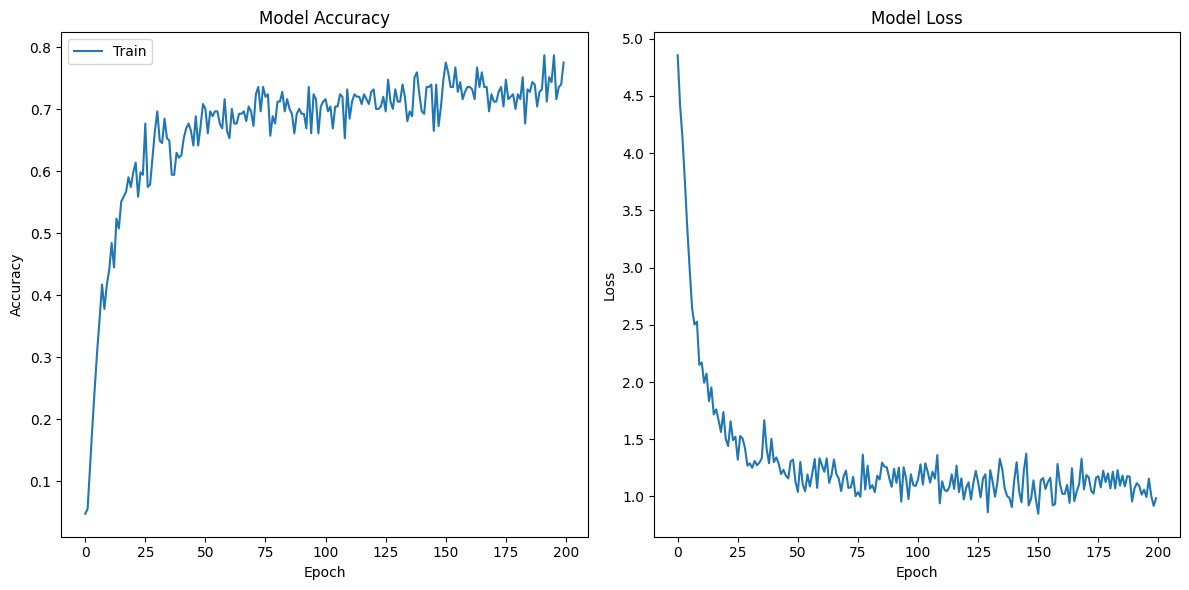

In [44]:
import matplotlib.pyplot as plt


# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()


In [45]:
model.save('new_model.h5', hist)